#### This Jupyter Notebook is part of the assessment of Applied Data Sciences Capstone project for the IBM Coursera Data Science Professional certification 

# How severe could a Car-Crash be in the UK ?
#### Crash-data exploration, modelling and predicting the severity of possible accident, using different classification models.

### Introduction: Business Problem 

Predicting the severity of a car crash is no easy task. And even when possible, precision
levels will vary significantly depending on, among many factors, the data available and how
well the problem has been modeled. But here using the data available to public from the UK
government website and supervised machine learning methods, we try to predict an accident
severity, given date, time, weather, light, road conditions, etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

### Data Aquisition

The UK government collects and publishes (usually on an annual basis) detailed information about traffic accidents across the country. This information includes, but is not limited to, geographical locations, weather conditions, type of vehicles, number of casualties and vehicle manoeuvres, making this a very interesting and comprehensive dataset for analysis and research.

The dataset comprises of **two** csv files:

**Accident_Information.csv**: every line in the file represents a unique traffic accident (identified by the AccidentIndex column), featuring various properties related to the accident as columns. Date range: 2005-2017

In [2]:
#Load Accident_Information
accident_df = pd.read_csv('Accident_Information.csv')

/home/user_id/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


**Vehicle_Information.csv**: every line in the file represents the involvement of a unique vehicle in a unique traffic accident, featuring various vehicle and passenger properties as columns. Date range: 2004-2016

In [3]:
#Load Vehicle_Information
vehicle_df = pd.read_csv('Vehicle_Information.csv',encoding='ISO-8859-1')

In [4]:
#check 
print('accident_df: \n\t Records:', accident_df.shape[0], '\n\t Columns:', accident_df.shape[1])
print('vehicle_df: \n\t Records:', vehicle_df.shape[0], '\n\t Columns:', vehicle_df.shape[1])

accident_df: 
	 Records: 2047256 
	 Columns: 34
vehicle_df: 
	 Records: 2177205 
	 Columns: 24


In [6]:
accident_df.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No


In [7]:
#dataframe information
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047256 entries, 0 to 2047255
Data columns (total 34 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index                               object 
 1   1st_Road_Class                               object 
 2   1st_Road_Number                              float64
 3   2nd_Road_Class                               object 
 4   2nd_Road_Number                              float64
 5   Accident_Severity                            object 
 6   Carriageway_Hazards                          object 
 7   Date                                         object 
 8   Day_of_Week                                  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  float64
 10  Junction_Control                             object 
 11  Junction_Detail                              object 
 12  Latitude                                     float64
 13  Light_Condit

In [8]:
vehicle_df.head()

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
0,200401BS00001,26 - 35,3.0,Urban area,4.0,1588.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
1,200401BS00002,26 - 35,NaN,Urban area,3.0,NaN,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,109,Data missing or out of range,Front,2004
2,200401BS00003,26 - 35,4.0,Data missing or out of range,NaN,998.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,109,Data missing or out of range,Front,2004
3,200401BS00003,66 - 75,NaN,Data missing or out of range,NaN,NaN,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
4,200401BS00004,26 - 35,1.0,Urban area,4.0,124.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,Data missing or out of range,Front,2004


In [9]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177205 entries, 0 to 2177204
Data columns (total 24 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Accident_Index                    object 
 1   Age_Band_of_Driver                object 
 2   Age_of_Vehicle                    float64
 3   Driver_Home_Area_Type             object 
 4   Driver_IMD_Decile                 float64
 5   Engine_Capacity_.CC.              float64
 6   Hit_Object_in_Carriageway         object 
 7   Hit_Object_off_Carriageway        object 
 8   Journey_Purpose_of_Driver         object 
 9   Junction_Location                 object 
 10  make                              object 
 11  model                             object 
 12  Propulsion_Code                   object 
 13  Sex_of_Driver                     object 
 14  Skidding_and_Overturning          object 
 15  Towing_and_Articulation           object 
 16  Vehicle_Leaving_Carriageway       ob

### Data Preprocessing

First consider the **accident_df** Dataframe

1. Drop Missing values

In [5]:
print('No. of Missing Values in Accidents initially:',round(accident_df.isna().sum().sum(), 3))
accident_df.dropna(inplace=True)

No. of Missing Values in Accidents initially: 1014501


In [6]:
print('No. of Missing Values in Accidents after drop:',round(accident_df.isna().sum().sum(), 3))

No. of Missing Values in Accidents after drop: 0


2. Date and Time

In [7]:
#format Date column in the proper format
accident_df['Date']= pd.to_datetime(accident_df['Date'], format="%Y-%m-%d")

Since on first look Time of day seems to play an import role, let's define a new column that groups the Time the accidents happened into one of five options:

- Morning Rush from 5am to 10am: 1
- Office Hours from 10am to 3pm (or: 10:00 - 15:00): 2
- Afternoon Rush from 3pm to 7pm (or: 15:00 - 19:00): 3
- Evening from 7pm to 11pm (or: 19:00 - 23:00): 4
- Night from 11pm to 5am (or: 23:00 - 05:00): 5

In [8]:
# create a little dictionary to later look up the groups I created
daytime_groups = {1: 'Morning: 5 to 10', 
                  2: 'Office Hours: 10 to 15', 
                  3: 'Afternoon Rush: 15 to 19', 
                  4: 'Evening: 19 to 23', 
                  5: 'Night: 23 to 5'}
# define a function that turns the hours into daytime groups
def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "1"
    elif hour >= 10 and hour < 15:
        return "2"
    elif hour >= 15 and hour < 19:
        return "3"
    elif hour >= 19 and hour < 23:
        return "4"
    else:
        return "5"

In [9]:
# slice first and second string from time column
accident_df['Hour'] = accident_df['Time'].str[0:2]
# convert new column to numeric datetype
accident_df['Hour'] = pd.to_numeric(accident_df['Hour'])
# drop null values in our new column
accident_df = accident_df.dropna(subset=['Hour'])
# cast to integer values
accident_df['Hour'] = accident_df['Hour'].astype('int')

# apply function to temporary hour column
accident_df['Daytime'] = accident_df['Hour'].apply(when_was_it)
accident_df[['Time', 'Hour', 'Daytime']].head()

,Time,Hour,Daytime
1,17:36,17,3
6,20:40,20,4
8,22:43,22,4
9,16:00,16,3
10,00:42,0,5


In [10]:
#drop Hour and Time columns
accident_df = accident_df.drop(columns=['Time', 'Hour'])

**Merge DataFrames with only necessary features**

In [11]:
# combine the accidents with the vehicles table
data_df = pd.merge(accident_df[['Accident_Index', 'Accident_Severity','Road_Surface_Conditions', 'Light_Conditions',
                              'Daytime', 'Speed_limit','Weather_Conditions', 'Urban_or_Rural_Area']], 
              vehicle_df[['Accident_Index', 'Age_Band_of_Driver', 'Age_of_Vehicle', 'Vehicle_Manoeuvre']], 
              on='Accident_Index')
data_df.head()

,Accident_Index,Accident_Severity,Road_Surface_Conditions,Light_Conditions,Daytime,Speed_limit,Weather_Conditions,Urban_or_Rural_Area,Age_Band_of_Driver,Age_of_Vehicle,Vehicle_Manoeuvre
0,200501BS00002,Slight,Dry,Darkness - lights lit,3,30.0,Fine no high winds,Urban,36 - 45,3.0,Slowing or stopping
1,200501BS00007,Slight,Dry,Darkness - lights lit,4,30.0,Fine no high winds,Urban,26 - 35,NaN,Going ahead other
2,200501BS00007,Slight,Dry,Darkness - lights lit,4,30.0,Fine no high winds,Urban,36 - 45,4.0,Parked
3,200501BS00012,Slight,Dry,Darkness - lights lit,5,30.0,Fine no high winds,Urban,26 - 35,6.0,Going ahead other
4,200501BS00014,Slight,Wet or damp,Darkness - lights lit,4,30.0,Fine no high winds,Urban,16 - 20,1.0,Going ahead other


In [12]:
#Drop missing values
data_df = data_df.dropna()
data_df.isna().sum().sum()

0

In [18]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 968614 entries, 0 to 1158465
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Accident_Index           968614 non-null  object 
 1   Accident_Severity        968614 non-null  object 
 2   Road_Surface_Conditions  968614 non-null  object 
 3   Light_Conditions         968614 non-null  object 
 4   Daytime                  968614 non-null  object 
 5   Speed_limit              968614 non-null  float64
 6   Weather_Conditions       968614 non-null  object 
 7   Urban_or_Rural_Area      968614 non-null  object 
 8   Age_Band_of_Driver       968614 non-null  object 
 9   Age_of_Vehicle           968614 non-null  float64
 10  Vehicle_Manoeuvre        968614 non-null  object 
dtypes: float64(2), object(9)
memory usage: 88.7+ MB


**Binning 'Age_of_Vehicle'**

In [13]:
age_of_vehicle_bins = {1: '1 to <2 years', 
                       2: '2 to <3 years', 
                       3: '3 to <7 years', 
                       4: '7 to <10 years', 
                       5: '>=10 years'}

# arguments in bins parameter denote left edge of each bin
data_df['Age_of_Vehicle'] = np.digitize(data_df['Age_of_Vehicle'], bins=[1,2,3,7,10])
# convert into categorical column
data_df['Age_of_Vehicle'] = data_df['Age_of_Vehicle'].astype('category')
# check the count within each bucket
data_df['Age_of_Vehicle'].value_counts().sort_index()

1     92632
2     82204
3    297847
4    206017
5    289914
Name: Age_of_Vehicle, dtype: int64

**Categorical to Numerical**

In [14]:
#convert speed_limit to categorical
data_df['Speed_limit'] = data_df['Speed_limit'].astype('category')
# categorical feature columns
cat_cols = ['Road_Surface_Conditions', 'Light_Conditions','Daytime', 'Speed_limit','Weather_Conditions', 
            'Urban_or_Rural_Area', 'Age_Band_of_Driver', 'Vehicle_Manoeuvre']

# create dummy variables from the categorical features
dummies = pd.get_dummies(data_df[cat_cols], drop_first=True)

**Features and Target**

In [15]:
model_df = pd.concat([data_df.drop(cat_cols,axis=1), dummies], axis=1)
features = model_df.drop(['Accident_Severity', 'Accident_Index'], axis=1)
features.head()

,Age_of_Vehicle,Road_Surface_Conditions_Dry,Road_Surface_Conditions_Flood over 3cm. deep,Road_Surface_Conditions_Frost or ice,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet or damp,Light_Conditions_Darkness - lights lit,Light_Conditions_Darkness - lights unlit,Light_Conditions_Darkness - no lighting,Light_Conditions_Data missing or out of range,...,Vehicle_Manoeuvre_Overtaking static vehicle - offside,Vehicle_Manoeuvre_Parked,Vehicle_Manoeuvre_Reversing,Vehicle_Manoeuvre_Slowing or stopping,Vehicle_Manoeuvre_Turning left,Vehicle_Manoeuvre_Turning right,Vehicle_Manoeuvre_U-turn,Vehicle_Manoeuvre_Waiting to go - held up,Vehicle_Manoeuvre_Waiting to turn left,Vehicle_Manoeuvre_Waiting to turn right
0,3,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,3,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
target = model_df[['Accident_Severity']]
target.shape

(968614, 1)

### Exploratory Data Analysis

We finally have features-set with 968614 records with 60 columns/features.  After understanding what each feature represents, we need to explore their respective values to understand their distribution and if there are any inconsistencies from their definition.

**Start with the Target feature**

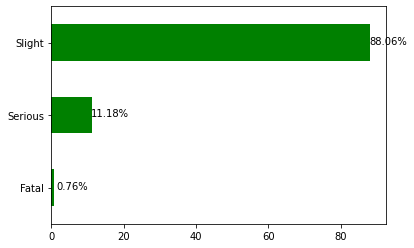

In [23]:
# Plots and creates labels for values plotted. Used for exploration of features.
def plot_and_annotate(data, **kwarg):
    ax = data['percent'].sort_values().plot(kind='barh', **kwarg)
    for p in ax.patches:
        width = p.get_width()
        plt.text(5 + width, p.get_y() + 0.55 * p.get_height(),
                 '{:1.2f}%'.format(width),
                 ha='center', va='center')

# Creates percentages for value_counts of a pd.series object.
def create_count_percentages(series, name=None):
    values = series.value_counts()
    expanded_value = values.to_frame(name)
    expanded_value['percent'] = values.apply(lambda _: _ / series.size * 100)
    return expanded_value

# Data must be loaded before definin create_plot_data due to inside reference.
def create_plot_data(data, feature):
    return create_count_percentages(data[feature], name=feature)

plot_data = create_plot_data(target, 'Accident_Severity')
plot_and_annotate(plot_data, color='green')

The first thing that we notice is the astonishing small number of fatal crashes there has been; considering this is data going back to the year 2000. We should also mention that New Zealand has had a consistent policy with regard to transportation and road safety.
However, the most important thing to notice is how these classes are distributed and the imbalance between them. Since we want to predict these classes, and because the dispatched response would be very different depending on our prediction, we definitely need to be very careful about how we measure the performance of our model.

To this end, and considering we will be trying different algorithms, we will rely on an array of performance metrics that will help us evaluate and chose the best algorithm for the task. Namely, for each algorithm, we will analyze the following performance metrics:
    
    - Precision
    - Recall
    - F-Score


**Relationship between Severity and Time**

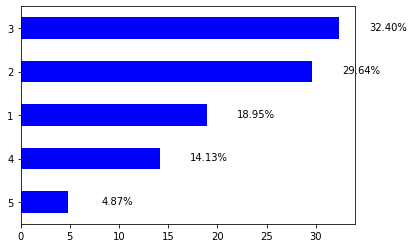

In [24]:
plot_data = create_plot_data(data_df, 'Daytime')
plot_and_annotate(plot_data, color='blue')

The graph seems to match one's intuition, with highest number of accident cases occuring during the Afternoon-Rush hour between 15:00 and 19:00. Also it appears that 'Daytime' clearly would be a very good feature to predict using classification models.

**Features Correlation**

Now that we have explored each feature individually, we need to check for possible correlations between a pair of features. 

Text(0.5, 1.0, 'Correlation Matrix')

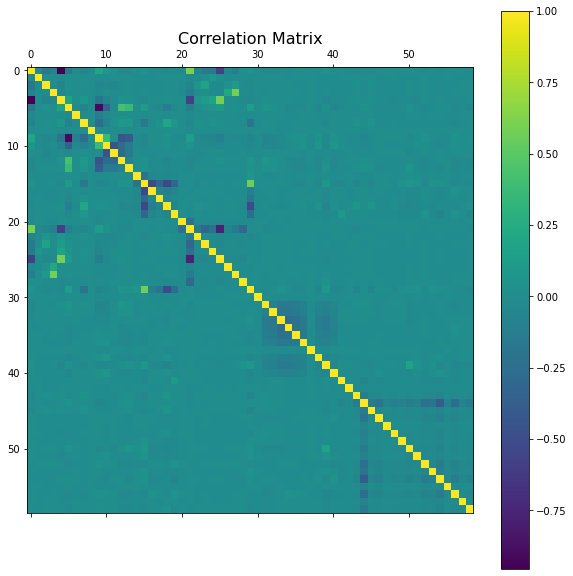

In [25]:
f = plt.figure(figsize=(10,10))
plt.matshow(features.corr(),fignum=f.number)
plt.colorbar()
plt.title('Correlation Matrix', fontsize=16)

We can see that every feature is dependent on almost every other feature. Making it virtually impossible to remove any of them due to correlation, since they all carry valuable information.As a result, we decide to keep all the remaining features.

### Predictive Model

**Train-Test-Split**

In [17]:
X = features

In [18]:
y = target['Accident_Severity'].values
y[0:5]

array(['Slight', 'Slight', 'Slight', 'Slight', 'Slight'], dtype=object)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

#### Models

1. Since all of the features in the dataset are categorical and also, it is not clear which ones are the most meaningful or relevant to the classification task. Therefore, we will focus first on decision tress as a and we will train and optimize a Random Forest classifer. The **Random Forest Classifier** we will use now is a popular classification algorithm and includes a class_weight parameter, which allows us to have the algorithm adjust for imbalanced classes.

In [20]:
# import classifier
from sklearn.ensemble import RandomForestClassifier
# import metrics
from sklearn.metrics import classification_report, confusion_matrix
# import evaluation tools
from sklearn.model_selection import KFold, cross_val_score

In [32]:
# instantiate RandomForestClassifier with entropy and class_weight
forest= RandomForestClassifier(random_state=4, criterion='entropy', n_jobs=3, class_weight='balanced')

# train
forest.fit(X_train, y_train)

# predict
y_hat  = forest.predict(X_test)

# evaluate
report = classification_report(y_test, y_hat)
print('Classification Report Random Forest - with Entropy and class_weight Parameter: \n', report)

Classification Report Random Forest - with Entropy and class_weight Parameter: 
               precision    recall  f1-score   support

       Fatal       0.02      0.27      0.03      1470
     Serious       0.13      0.33      0.19     21624
      Slight       0.90      0.61      0.73    170629

    accuracy                           0.58    193723
   macro avg       0.35      0.40      0.32    193723
weighted avg       0.81      0.58      0.66    193723



2. **Logistic Regression** is a variation of Linear Regression, useful when the observed dependent variable, y, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

In [24]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear',class_weight='balanced').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight='balanced', solver='liblinear')

In [25]:
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

#### Confusion Matrix

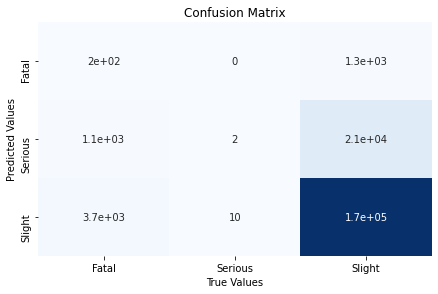

In [31]:
import seaborn as sns
matrix = confusion_matrix(y_test, yhat)

dataframe = pd.DataFrame(matrix, index=['Fatal', 'Serious', 'Slight'], 
                         columns=['Fatal', 'Serious', 'Slight'])

# create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()

**Comparison Metrics**

In [38]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
print("RandomForest Jaccard index: %.2f" % jaccard_score(y_test, y_hat,average='weighted'))
print("RandomForest: %.2f" % f1_score(y_test, y_hat, average='weighted') )
print("LR Jaccard index: %.2f" % jaccard_score(y_test, yhat,average='weighted'))
print("LR F1-score: %.2f" % f1_score(y_test, yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, yhat_prob))

RandomForest Jaccard index: 0.51
RandomForest: 0.66
LR Jaccard index: 0.76
LR F1-score: 0.82
LR LogLoss: 0.61


**Accuracy Report**

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| RandomForest       | 0.51    | 0.66     | NA      |
| LogisticRegression | 0.76    | 0.82     | 0.61    |